#Problem Statement

#In this project i will aim to create a model that will predict student exam scores based on various performance factors such as hours studied,motivation, attendance, parental involvement, and motivational level. The goal is to build a predictive model that helps identify the key factors influencing academic performance, allowing educators to implement targeted interventions to improve student outcomes. There will also be additions graphs and pbservatiosn like how a variety of factors like the correlation and relationship between hours studied and turoting session and motivation.

In [39]:
#import necessary libraries
import pandas as pd

# Load the dataset
file_path = r'C:\Users\\Admin\\Desktop\\OPIT\\TERM 4\\StudentPerformanceFactors.csv'
original_dataset = pd.read_csv(file_path)

#Display the first few rows to inspect the data set
original_dataset.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


# Data Preprocessing 
We will start by cleaning the data. We we handle missing values, remove duplicagtes and encode categorial features. The goal is to prepare the data for modelling.

In [40]:
# Check for missing values
missing_values = original_dataset.isnull().sum()

# Check for duplicates
duplicates = original_dataset.duplicated().sum()

# Print the results
print(f"Missing values per column:\n{missing_values}")
print(f"Number of duplicate rows: {duplicates}")

# Drop rows with missing values
dataset_cleaned = original_dataset.dropna()

# Remove duplicates
dataset_cleaned = dataset_cleaned.drop_duplicates()

# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 
                       'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 
                       'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 
                       'Distance_from_Home', 'Gender']

encoder = LabelEncoder()

for column in categorical_columns:
    dataset_cleaned[column] = encoder.fit_transform(dataset_cleaned[column])

# Check the cleaned data
dataset_cleaned.head()

Missing values per column:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64
Number of duplicate rows: 0


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


# Explotastory Data Analysis (EDA)

In this section I will explore different relationsships between the features and will use visulisations to understand.

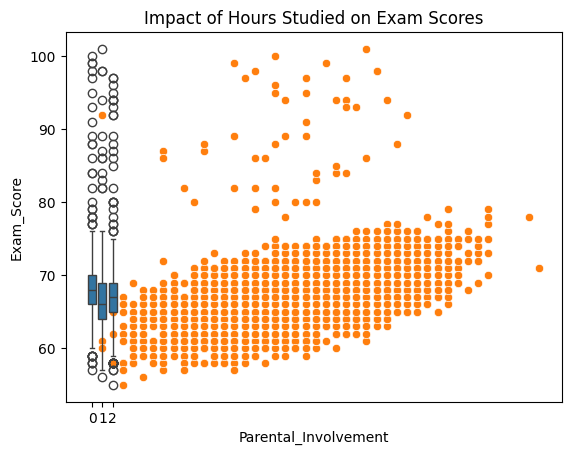

In [46]:

import matplotlib.pyplot as plt 
import seaborn as sns 

# Boxplot for Parental Involvment Vs Exam Score
sns.boxplot(x='Parental_Involvement', y='Exam_Score' , data =dataset_cleaned)
plt.title("Impact of Parental Involvement on Exam Scores")
plt.show

# Scatter plot for hours studied Vs Exam Score
sns.scatterplot(x ='Hours_Studied', y ='Exam_Score', data=dataset_cleaned)
plt.title('Impact of Hours Studied on Exam Scores')
plt.show()